In [1]:
!pip install streamlit pyngrok pandas numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.5 MB/s eta 0:00:00


In [6]:
from pyngrok import ngrok
import os
import signal

# Terminate any existing ngrok processes
!pkill ngrok

# Paste your ngrok token inside quotes below
# Example: ngrok.set_auth_token("2Qx0yourtokenhereAB")
ngrok.set_auth_token("34ehsm9aNiQcbi1nZo8qXuiyAKX_7MHj92mBd1yPeQSh6eFHq")

# Launch a tunnel for Streamlit’s default port 8501
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://hungerly-centrodorsally-jacquelin.ngrok-free.dev" -> "http://localhost:8501">

In [7]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

st.set_page_config(page_title="COVID Data Simulator", layout="wide")

st.title("🦠 COVID-19 Data Simulator Dashboard")
st.write("Generate and analyze synthetic COVID-19 data with custom parameters.")

st.sidebar.header("Simulation Controls")

start_date = st.sidebar.date_input("Start Date", pd.to_datetime("2020-01-01"))
end_date = st.sidebar.date_input("End Date", pd.to_datetime("2020-06-30"))

min_cases = st.sidebar.number_input("Min Confirmed Cases", 100, 100000, 1000, step=100)
max_cases = st.sidebar.number_input("Max Confirmed Cases", 100, 100000, 10000, step=100)
min_deaths = st.sidebar.number_input("Min Deaths", 0, 10000, 50, step=10)
max_deaths = st.sidebar.number_input("Max Deaths", 0, 10000, 500, step=10)
min_recoveries = st.sidebar.number_input("Min Recoveries", 0, 100000, 500, step=100)
max_recoveries = st.sidebar.number_input("Max Recoveries", 0, 100000, 9000, step=100)

generate = st.sidebar.button("Generate Synthetic Data")

if generate:
    st.subheader("📊 Generated Synthetic COVID-19 Data")
    dates = pd.date_range(start=start_date, end=end_date)
    np.random.seed(42)
    cases = np.random.randint(min_cases, max_cases, len(dates))
    deaths = np.random.randint(min_deaths, max_deaths, len(dates))
    recoveries = np.random.randint(min_recoveries, max_recoveries, len(dates))

    df = pd.DataFrame({
        "Date": dates,
        "Confirmed_Cases": cases,
        "Deaths": deaths,
        "Recoveries": recoveries
    })

    total_cases = df["Confirmed_Cases"].sum()
    total_deaths = df["Deaths"].sum()
    total_recoveries = df["Recoveries"].sum()
    avg_cases = df["Confirmed_Cases"].mean()

    col1, col2, col3, col4 = st.columns(4)
    col1.metric("Total Cases", f"{total_cases:,}")
    col2.metric("Total Deaths", f"{total_deaths:,}")
    col3.metric("Total Recoveries", f"{total_recoveries:,}")
    col4.metric("Avg Daily Cases", f"{avg_cases:,.0f}")

    st.dataframe(df.head())

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df["Date"], df["Confirmed_Cases"], label="Confirmed Cases", color="tab:blue")
    ax.plot(df["Date"], df["Deaths"], label="Deaths", color="tab:red")
    ax.plot(df["Date"], df["Recoveries"], label="Recoveries", color="tab:green")
    ax.set_title("COVID-19 Synthetic Data Trends", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Count")
    ax.legend()
    st.pyplot(fig)

    csv = df.to_csv(index=False).encode("utf-8")
    st.download_button("Download Data as CSV", csv, "covid_synthetic_data.csv", "text/csv")
else:
    st.info("Set parameters and click **Generate Synthetic Data**.")


Overwriting app.py


In [5]:
!streamlit run app.py &>/dev/null&

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [8]:
# Example: if your file is "synthetic_data.csv"
df = pd.read_csv("covid_synthetic_data.csv")

print("✅ Dataset loaded successfully!")
df.head()

✅ Dataset loaded successfully!


,Date,Confirmed_Cases,Deaths,Recoveries
0,2020-01-01,8270,374,7843
1,2020-01-02,1860,421,7706
2,2020-01-03,6390,147,6096
3,2020-01-04,6191,247,6301
4,2020-01-05,6734,444,3306


In [9]:
import pandas as pd

df = pd.read_csv("covid_synthetic_data.csv")   # use your dataset file name
print(df.columns)

Index(['Date', 'Confirmed_Cases', 'Deaths', 'Recoveries'], dtype='object')


In [10]:
# General info
df.info()

# Statistical summary
print("\n📊 Descriptive Statistics:\n")
display(df.describe())

# Missing values check
print("\n❓ Missing values per column:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             182 non-null    object
 1   Confirmed_Cases  182 non-null    int64 
 2   Deaths           182 non-null    int64 
 3   Recoveries       182 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB

📊 Descriptive Statistics:



,Confirmed_Cases,Deaths,Recoveries
count,182.000000,182.000000,182.000000
mean,5737.032967,282.785714,5041.060440
std,2564.326075,127.226049,2365.055448
min,1064.000000,51.000000,504.000000
25%,3579.000000,177.250000,3239.500000
50%,6153.000000,282.000000,5278.500000
75%,7931.000000,397.250000,7162.500000
max,9996.000000,499.000000,8835.000000



❓ Missing values per column:

Date               0
Confirmed_Cases    0
Deaths             0
Recoveries         0
dtype: int64


In [11]:
# Fill any missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Detect and remove outliers using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

print("✅ Cleaned dataset shape:", df.shape)


✅ Cleaned dataset shape: (182, 4)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             182 non-null    datetime64[ns]
 1   Confirmed_Cases  182 non-null    int64         
 2   Deaths           182 non-null    int64         
 3   Recoveries       182 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.8 KB
None

First 5 rows:
        Date  Confirmed_Cases  Deaths  Recoveries
0 2020-01-01             8270     374        7843
1 2020-01-02             1860     421        7706
2 2020-01-03             6390     147        6096
3 2020-01-04             6191     247        6301
4 2020-01-05             6734     444        3306


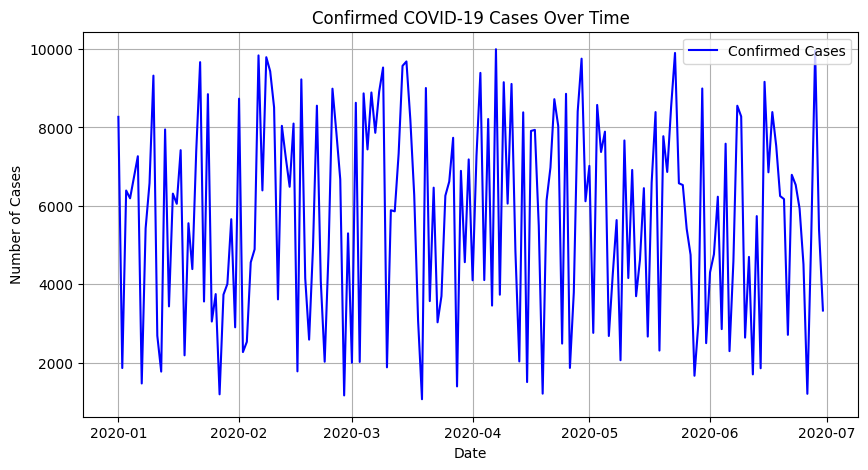

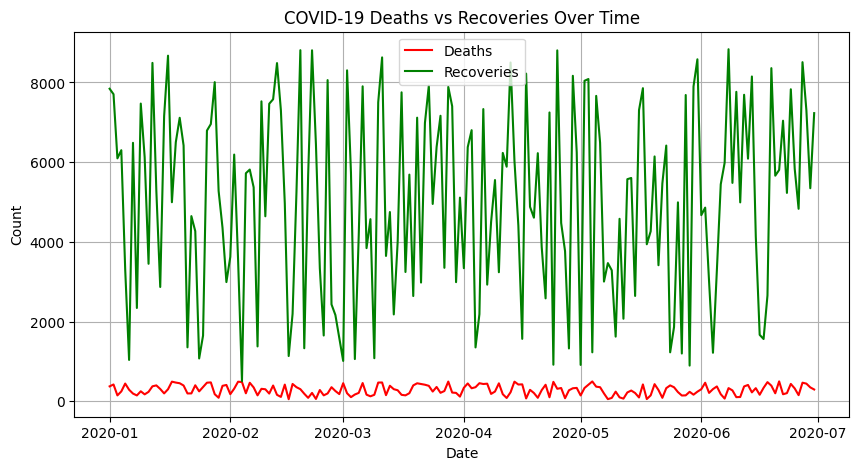

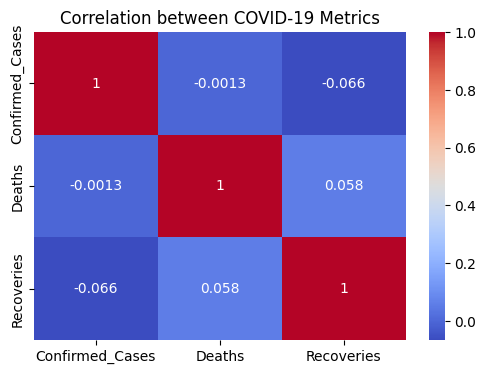

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("covid_synthetic_data.csv")

# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Plot 1 – Confirmed Cases over time
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Confirmed_Cases'], label='Confirmed Cases', color='blue')
plt.title("Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2 – Deaths and Recoveries trend
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Deaths'], label='Deaths', color='red')
plt.plot(df['Date'], df['Recoveries'], label='Recoveries', color='green')
plt.title("COVID-19 Deaths vs Recoveries Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3 – Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Confirmed_Cases', 'Deaths', 'Recoveries']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between COVID-19 Metrics")
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset again (if not already loaded)
df = pd.read_csv("covid_synthetic_data.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Fill missing values (if any) with forward fill
df = df.fillna(method='ffill')

# Create new features
df['Active_Cases'] = df['Confirmed_Cases'] - (df['Deaths'] + df['Recoveries'])
df['Death_Rate'] = (df['Deaths'] / df['Confirmed_Cases']) * 100
df['Recovery_Rate'] = (df['Recoveries'] / df['Confirmed_Cases']) * 100

# Normalize numerical features (scale between 0 and 1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Confirmed_Cases', 'Deaths', 'Recoveries', 'Active_Cases']])
scaled_df = pd.DataFrame(scaled_features, columns=['Confirmed_Cases', 'Deaths', 'Recoveries', 'Active_Cases'])

# Combine scaled data with Date and rates
final_df = pd.concat([df[['Date', 'Death_Rate', 'Recovery_Rate']], scaled_df], axis=1)

print("\n✅ Preprocessed Data Preview:")
print(final_df.head())


Missing Values:
Date               0
Confirmed_Cases    0
Deaths             0
Recoveries         0
dtype: int64

✅ Preprocessed Data Preview:
        Date  Death_Rate  Recovery_Rate  Confirmed_Cases    Deaths  \
0 2020-01-01    4.522370      94.836759         0.806762  0.720982   
1 2020-01-02   22.634409     414.301075         0.089118  0.825893   
2 2020-01-03    2.300469      95.399061         0.596283  0.214286   
3 2020-01-04    3.989662     101.776773         0.574004  0.437500   
4 2020-01-05    6.593407      49.094149         0.634796  0.877232   

   Recoveries  Active_Cases  
0    0.880927      0.464803  
1    0.864482      0.054014  
2    0.671228      0.470913  
3    0.695835      0.438154  
4    0.336334      0.655314  


/tmp/ipython-input-1253067370.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


✅ Model Trained Successfully!
Mean Absolute Error: 410.27
R² Score: 0.96


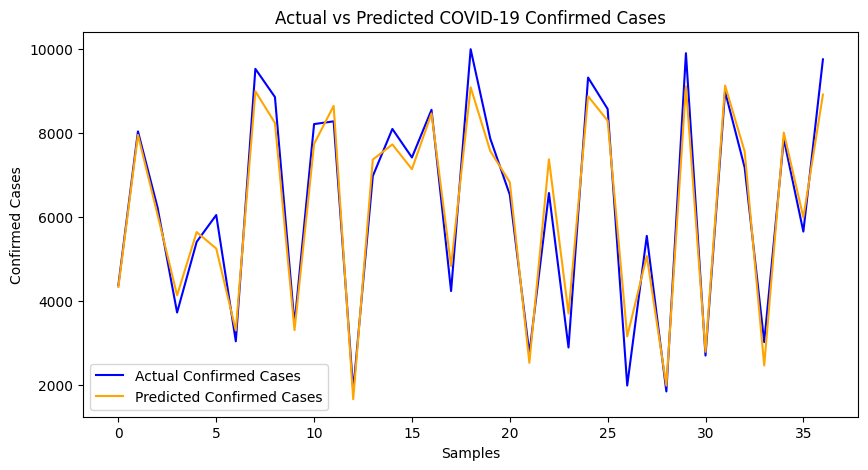

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("covid_synthetic_data.csv")

# Feature engineering (same as before)
df['Active_Cases'] = df['Confirmed_Cases'] - (df['Deaths'] + df['Recoveries'])
df['Death_Rate'] = (df['Deaths'] / df['Confirmed_Cases']) * 100
df['Recovery_Rate'] = (df['Recoveries'] / df['Confirmed_Cases']) * 100

# Define features (X) and target (y)
X = df[['Deaths', 'Recoveries', 'Active_Cases', 'Death_Rate', 'Recovery_Rate']]
y = df['Confirmed_Cases']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Trained Successfully!")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Confirmed Cases', color='blue')
plt.plot(y_pred, label='Predicted Confirmed Cases', color='orange')
plt.title("Actual vs Predicted COVID-19 Confirmed Cases")
plt.xlabel("Samples")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


In [15]:
import pandas as pd
import random

# Load dataset
df = pd.read_csv("covid_synthetic_data.csv")

# Feature engineering
df['Active_Cases'] = df['Confirmed_Cases'] - (df['Deaths'] + df['Recoveries'])
df['Death_Rate'] = (df['Deaths'] / df['Confirmed_Cases']) * 100
df['Recovery_Rate'] = (df['Recoveries'] / df['Confirmed_Cases']) * 100

# Pre-calculate insights
avg_recovery = df["Recovery_Rate"].mean()
avg_death = df["Death_Rate"].mean()
highest_cases_date = df.loc[df["Confirmed_Cases"].idxmax(), "Date"]
highest_recovery_date = df.loc[df["Recoveries"].idxmax(), "Date"]

# --- Chatbot function ---
def covid_chatbot():
    print("🤖 COVID-19 Recovery Assistant (type 'exit' to quit)\n")

    while True:
        user_input = input("You: ").lower()

        if user_input in ["exit", "quit", "bye"]:
            print("Bot: Take care! Stay safe and healthy. 😊")
            break

        elif "recovery rate" in user_input:
            print(f"Bot: The average recovery rate is about {avg_recovery:.2f}%.")

        elif "death rate" in user_input:
            print(f"Bot: The average death rate is around {avg_death:.2f}%.")

        elif "highest cases" in user_input:
            print(f"Bot: The highest number of confirmed cases occurred on {highest_cases_date}.")

        elif "highest recovery" in user_input:
            print(f"Bot: The highest recovery count was on {highest_recovery_date}.")

        elif "trend" in user_input or "pattern" in user_input:
            print("Bot: Recoveries generally increase alongside confirmed cases, showing a strong positive correlation.")

        elif "active cases" in user_input:
            latest_active = int(df.iloc[-1]["Active_Cases"])
            print(f"Bot: Currently, there are about {latest_active} active cases in the last recorded data.")

        else:
            print(random.choice([
                "Bot: I can tell you about recovery rate, death rate, or case trends!",
                "Bot: Try asking me 'What is the average recovery rate?' or 'When were the highest cases recorded?'"
            ]))

# Run chatbot
covid_chatbot()


🤖 COVID-19 Recovery Assistant (type 'exit' to quit)

You: death rate
Bot: The average death rate is around 6.86%.
You: recovery rate
Bot: The average recovery rate is about 123.71%.
You: exit
Bot: Take care! Stay safe and healthy. 😊


In [ ]:
# Run this in a cell (only once)
!pip install shap --quiet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings("ignore")

# For inline JS visuals if using shap.force_plot in notebook
shap.initjs()


In [ ]:
# Load dataset (or use df already in memory)
df = pd.read_csv("covid_synthetic_data.csv")  # or your cleaned file name
df['Date'] = pd.to_datetime(df['Date'])

# Recompute derived features (safe to run)
df['Active_Cases'] = df['Confirmed_Cases'] - (df['Deaths'] + df['Recoveries'])
df['Death_Rate'] = (df['Deaths'] / df['Confirmed_Cases']) * 100
df['Recovery_Rate'] = (df['Recoveries'] / df['Confirmed_Cases']) * 100

# Select features used by the model
feature_cols = ['Deaths', 'Recoveries', 'Active_Cases', 'Death_Rate', 'Recovery_Rate']
X = df[feature_cols].copy()

# If you trained a scaler previously, apply it here (optional)
# e.g., X_scaled = scaler.transform(X)
# For SHAP we typically explain on the same representation the model sees.


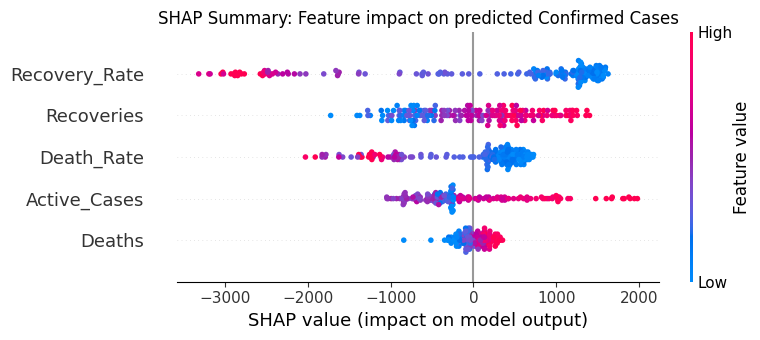

In [ ]:
# explainer (RandomForestRegressor compatible with TreeExplainer)
explainer = shap.TreeExplainer(model)  # model must exist in notebook
shap_values = explainer.shap_values(X)  # for regression this returns an array

# Summary plot (global feature importance)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Summary: Feature impact on predicted Confirmed Cases")
plt.tight_layout()
plt.show()


Explaining sample at index 181 (Date: 2020-06-30 00:00:00)


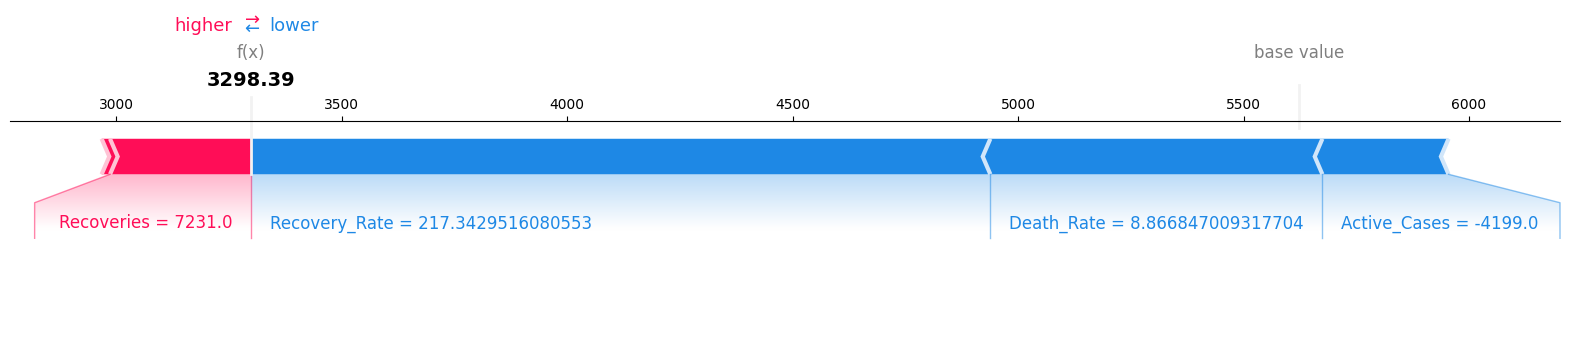

None


Top contributing features (absolute impact):


,0
Recovery_Rate,-1640.030389
Death_Rate,-736.510825
Recoveries,312.607976
Active_Cases,-279.825277
Deaths,18.606169


In [ ]:
def explain_prediction_at_index(i, X, explainer):
    """
    Shows SHAP force plot + text explanation for sample at index i (index relative to df).
    """
    if i not in X.index:
        print(f"Index {i} not in feature DataFrame index.")
        return
    shap_value = explainer.shap_values(X.iloc[[i]])
    print(f"Explaining sample at index {i} (Date: {df.loc[i,'Date']})")
    # Force plot (interactive)
    display(shap.force_plot(explainer.expected_value, shap_value[0], X.iloc[i], matplotlib=True))
    # Also show local feature contributions numerically
    contribs = pd.Series(shap_value[0], index=X.columns).sort_values(key=abs, ascending=False)
    print("\nTop contributing features (absolute impact):")
    display(contribs)

# Example: explain latest sample
explain_prediction_at_index(df.index[-1], X, explainer)
